# 10. Recursion, Backtracking, Recurrence Relations

## 10.1 About Recursion, Backtracking, Recurrence Relations



Recursion, backtracking, and recurrence relations represent fundamental pillars in computer science and mathematics, serving as quintessential tools for problem solving, algorithm design, and analysis. This work focuses on the intricacies of these concepts, revealing their underlying principles, applications, and significance in computational paradigms. Through a comprehensive survey and analysis, we reveal the profound implications of recursion, a systematic approach to backtracking, and the mathematical elegance of recurrence relations. Combining theoretical insights with practical examples, we elucidate how these concepts synergistically contribute to the design of efficient algorithms and enable the solution of complex computational problems. Furthermore, we clarify the interplay between these concepts, demonstrating their complementary roles in problem-solving strategies and algorithmic optimization. Ultimately, this work serves as a comprehensive guide for researchers, practitioners, and enthusiasts seeking to harness the power of recursion, backtracking, and recurrence relations in their computational endeavors.

<img src="https://www.scaler.com/topics/images/recursion-backtracking_Thumbnail.webp" />

---

## 10.2 Concept 1: Recursion

### 10.2.1 Intuition



Recursion is a powerful tool in programming, where a function solves a problem by reducing it to smaller instances of the same problem. This method is particularly useful for tasks that can be broken down into similar sub-tasks. Recursion involves two main components:


1. Base Case: This is the condition under which the recursive calls stop. Without a base case, the function would call itself indefinitely, leading to a stack overflow.
2. Recursive Case: This involves the function calling itself with modified parameters, gradually working towards the base case.

### 10.2.2 Example

The factorial of a number 𝑛 n (denoted as 𝑛 ! n!) is the product of all positive integers less than or equal to 𝑛 n. The factorial can be defined recursively:

    * Base Case: 1 ! = 1 1!=1
    * Recursive Case: 𝑛 ! = 𝑛 × ( 𝑛 − 1 ) ! n!=n×(n−1)!

**Step-by-Step Explanation**

Let's see how factorial(5) is computed:

1. factorial(5)
  * Calls factorial(4)
2. factorial(4)
  * Calls factorial(3)
3. factorial(3)
  * Calls factorial(2)
4. factorial(2)
  * Calls factorial(1)
5. factorial(1)
  * Returns 1 (base case reached)


Now, the function returns values back up the call stack:

 * factorial(2) returns 2×1=2
 * factorial(3) returns 3×2=6
 * factorial(4) returns 4×6=24
 * factorial(5) returns 5×24=120

**Visualization**

This diagram illustrates the process:
 * The arrows show the flow of recursive calls from factorial(5) down to factorial(1).
 * The return path shows how the computed values are returned back up the call stack, ultimately resulting in the final answer for factorial(5).

**Advantages and Disadvantages of Recursion**

**Advantages:**

* Simpler Code: Recursive solutions are often more elegant and easier to understand for problems that naturally fit a recursive pattern (e.g., tree traversal, factorial computation).
* Divide and Conquer: Recursion is a natural fit for divide-and-conquer algorithms, where a problem is broken down into smaller sub-problems.

**Disadvantages:**

* Performance: Recursive solutions can be less efficient due to function call overhead and can lead to excessive memory use due to call stack growth.
* Complexity: Understanding and debugging recursive functions can be more challenging, especially when multiple recursive calls are involved.




<img src="https://wpminers.com/wp-content/uploads/2022/09/recursive-function.png" />



### 10.2.3 Code

In [ ]:
def factorial(n):
    if n == 1:  # Base case
        return 1
    else:
        return n * factorial(n - 1)  # Recursive call


factorial(5)

120

## 10.3 Concept 2: Backtracking

### 10.3.1 Intuition



**Backtracking** is an algorithmic technique used for solving problems recursively by trying to build a solution incrementally, one piece at a time, and removing solutions that fail to satisfy the constraints of the problem at any point in time. It is particularly useful for solving constraint satisfaction problems like puzzles, permutations, and combinations.

**Key Concepts of Backtracking**
* Choice: Making a choice among multiple options.
* Constraint: Checking if the current choice leads to a solution or violates the constraints.
* Solution: If the choice leads to a solution, proceed; otherwise, backtrack by undoing the choice and try another option.


### 10.3.2 Example

Consider a maze represented by a grid where some cells are blocked, and the goal is to find a path from the start to the end.

**Step-by-Step Explanation**
1. Initialization: Start at the initial position (0,0).
2. Recursive Exploration: Move in possible directions (down and right).
3. Safety Check: Check if the move is valid (inside the maze and on a path).
4. Base Case: If the end is reached, mark the path as part of the solution.
5. Backtracking: If a move doesn't lead to a solution, undo the move and try the next option.

<img src="https://www.researchgate.net/publication/323067430/figure/fig2/AS:689093398777857@1541304077879/Illustrative-view-to-visualize-Backtrack-Algorithm-for-4-Queens-Problem.ppm" />

**Detailed Explanation**

Key Components
  * Start Point: The initial position where the search begins.
  * End Point: The goal position to reach.
  * Blocked Cells: Cells that cannot be passed through.
  * Path Cells: Cells that are part of the current path being explored.

Steps in Backtracking

  1. Move Forward: Starting from the initial position, the algorithm tries to move in possible directions (right and down in this example).
  2. Check Constraints: For each move, the algorithm checks if it is within the bounds of the maze and whether the cell is not blocked.
  3. Reaching the End: If the algorithm reaches the end point, the path is marked as a solution.
  4. Backtrack: If a move leads to a blocked cell or a dead end, the algorithm backtracks to the previous cell and tries a different path.

Path Exploration

  * The illustration shows arrows indicating the direction of movement.
  * When the algorithm encounters a blocked cell or dead end, it backtracks, indicated by arrows going back to previous cells.
  * The successful path to the end is eventually found and marked.

**Advantages and Disadvantages of Backtracking**

Advantages:

* Flexibility: Can solve a wide range of problems like puzzles, permutations, and combinations.
* Simplicity: Often easier to implement for problems with clear constraints.

Disadvantages:

* Efficiency: Can be inefficient for large problems due to the exponential number of possible solutions.
* Complexity: Managing the state and backtracking can become complex for intricate problems.




### 10.3.3 Code

In [ ]:
def is_safe(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 1

def solve_maze(maze):
    solution = [[0]*len(maze[0]) for _ in range(len(maze))]
    if not solve_maze_util(maze, 0, 0, solution):
        print("No solution exists")
    else:
        for row in solution:
            print(row)

def solve_maze_util(maze, x, y, solution):
    if x == len(maze) - 1 and y == len(maze[0]) - 1 and maze[x][y] == 1:
        solution[x][y] = 1
        return True

    if is_safe(maze, x, y):
        solution[x][y] = 1
        if solve_maze_util(maze, x + 1, y, solution):
            return True
        if solve_maze_util(maze, x, y + 1, solution):
            return True
        solution[x][y] = 0
        return False

    return False

# Example maze (1 = open path, 0 = blocked)
maze = [
    [1, 0, 0, 0],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 1]
]

solve_maze(maze)


[1, 0, 0, 0]
[1, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 1, 1]


## 10.4 Concept 3: Recurrence Relations

### 10.4.1 Intuition



A recurrence relation is a mathematical formula that defines each term of a sequence in terms of the preceding terms. They are widely used in computer science for analyzing the time complexity of recursive algorithms and for defining sequences in mathematics.

**Key Concepts**
* Initial Conditions: The starting values of the sequence.
* Recurrence Formula: The equation that relates a term to its predecessors.

### 10.3.2 Example

The Fibonacci sequence is a series of numbers where each number (after the first two) is the sum of the two preceding ones. The sequence commonly starts with 0 and 1. The recurrence relation defining the Fibonacci sequence is:

𝐹 ( 𝑛 ) = 𝐹 ( 𝑛 − 1 ) + 𝐹 ( 𝑛 − 2 )

with initial conditions:

𝐹 ( 0 ) = 0

𝐹 ( 1 ) = 1

Let's calculate the first few Fibonacci numbers using this recurrence relation:

* 𝐹(0)=0
* 𝐹(1)=1
* 𝐹(2)=𝐹(1)+𝐹(0)=1+0=1
* 𝐹(3)=𝐹(2)+𝐹(1)=1+1=2
* 𝐹(4)=𝐹(3)+𝐹(2)=2+1=3
* 𝐹(5)=𝐹(4)+𝐹(3)=3+2=5
* 𝐹(6)=𝐹(5)+𝐹(4)=5+3=8
* 𝐹(7)=𝐹(6)+𝐹(5)=8+5=13
* 𝐹(8)=𝐹(7)+𝐹(6)=13+8=21


Here is the visualization of the first 10 Fibonacci numbers:

* The x-axis represents the index n.
* The y-axis represents the corresponding Fibonacci number F(n).

The plot shows the characteristic exponential growth of the Fibonacci sequence, where each point represents a Fibonacci number calculated using the recurrence relation
F(n)=F(n−1)+F(n−2).

### 10.4.3 Code

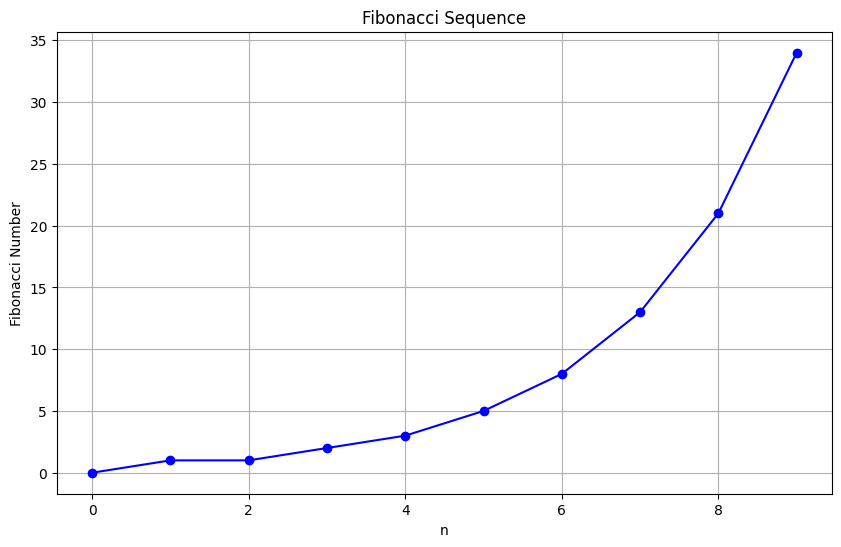

In [ ]:
import matplotlib.pyplot as plt

def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

# Generate the first 10 Fibonacci numbers
fib_sequence = [fibonacci(i) for i in range(10)]

# Plot the Fibonacci sequence
plt.figure(figsize=(10, 6))
plt.plot(range(10), fib_sequence, marker='o', linestyle='-', color='b')
plt.title('Fibonacci Sequence')
plt.xlabel('n')
plt.ylabel('Fibonacci Number')
plt.grid(True)
plt.show()


## 10.5 LeetCode Problems related to "Recursion, Backtracking, Recurrence Relations"

### 10.5.1 Problem 1: Generate Parentheses (LeetCode Problem #22)

#### 10.5.1.1 Problem statement

Given \( n \) pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

#### 10.5.1.2 Intuition

Use backtracking to generate all valid combinations by ensuring that at any point, the number of closing parentheses does not exceed the number of opening parentheses.

#### 10.5.1.3 Code

In [ ]:
# Generate Parentheses using backtracking

def generate_parentheses(n):
    result = []
    def backtrack(s='', left=0, right=0):
        if len(s) == 2 * n:
            result.append(s)
            return
        if left < n:
            backtrack(s + '(', left + 1, right)
        if right < left:
            backtrack(s + ')', left, right + 1)
    backtrack()
    return result

# Test
print(generate_parentheses(3))  # Output: ["((()))","(()())","(())()","()(())","()()()"]

['((()))', '(()())', '(())()', '()(())', '()()()']


### 10.5.2 Problem 2: Subsets (LeetCode Problem #78)

#### 10.5.2.1 Problem statement

Given an integer array `nums` of unique elements, return all possible subsets (the power set).

#### 10.5.2.2 Intuition

Use backtracking to explore all possible subsets by including or excluding each element.

#### 10.5.2.3 Code

In [ ]:
# Subsets using backtracking

def subsets(nums):
    result = []
    def backtrack(start=0, path=[]):
        result.append(path)
        for i in range(start, len(nums)):
            backtrack(i + 1, path + [nums[i]])
    backtrack()
    return result

# Test
print(subsets([1,2,3]))  # Output: [[],[1],[1,2],[1,2,3],[1,3],[2],[2,3],[3]]

### 10.5.3 Problem 3: Permutations (LeetCode Problem #46)

#### 10.5.3.1 Problem statement

Given an array `nums` of distinct integers, return all possible permutations.

#### 10.5.3.2 Intuition

Use backtracking to generate all permutations by swapping elements.

#### 10.5.3.3 Code

In [ ]:
# Permutations using backtracking

def permute(nums):
    result = []
    def backtrack(start=0):
        if start == len(nums):
            result.append(nums[:])
        for i in range(start, len(nums)):
            nums[start], nums[i] = nums[i], nums[start]
            backtrack(start + 1)
            nums[start], nums[i] = nums[i], nums[start]
    backtrack()
    return result

# Test
print(permute([1,2,3]))  # Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

## 10.6 Conclusion

Recursion, backtracking, and recurrence relations are powerful techniques in algorithm design and problem-solving. Each has unique strengths and applications:

* **Recursion** breaks down complex problems into simpler subproblems.
  * Example: Factorial calculation and Fibonacci sequence.
* **Backtracking** systematically explores all possible solutions for constraint satisfaction problems.
  * Example: Sudoku solver, generating well-formed parentheses, and subsets/permutations.
* **Recurrence Relations** provide a mathematical framework for defining problems in terms of their subproblems and analyzing the time complexity of recursive algorithms.
  * Example: Recurrence relation for the Fibonacci sequence.
  
By mastering these techniques, you are well-equipped to tackle a wide range of computational challenges, solve classic algorithmic problems, optimize solutions, and analyze time complexity effectively.

## 10.7 What to read next

Having explored recursion, backtracking, and recurrence relations, it is essential to expand your knowledge to other fundamental topics in computer science and algorithms. These topics build on the principles you've learned and introduce new techniques and applications, enabling you to tackle a wider range of problems with greater efficiency and insight. By diving into the following topics, you'll gain a deeper understanding of how to solve complex problems, optimize solutions, and analyze algorithms effectively.

#### 1. Dynamic Programming

**Why Read This?**

Dynamic programming (DP) is a method for solving complex problems by breaking them down into simpler subproblems and solving each subproblem just once, storing their solutions. It is particularly useful for optimization problems.

- **Example:** The Fibonacci sequence and the knapsack problem, where DP optimizes the recursive approach by storing intermediate results.
- **Applications:** Widely used in various fields such as operations research, economics, bioinformatics, and more.

**Importance:**

- Helps in solving problems with overlapping subproblems and optimal substructure efficiently.
- Enhances problem-solving skills by introducing memoization and tabulation techniques.

#### 2. Divide and Conquer Algorithms

**Why Read This?**

Divide and conquer is an algorithmic paradigm that solves a problem by breaking it into smaller subproblems, solving each subproblem recursively, and combining their solutions to solve the original problem.

- **Example:** Merge sort and quicksort, where the problem of sorting an array is divided into smaller subproblems of sorting subarrays.
- **Applications:** Used in various algorithms for sorting, searching, and multiplication of large numbers.

**Importance:**

- Provides a framework for designing efficient algorithms.
- Helps in understanding the recursive decomposition of problems and the concept of conquering subproblems.

#### 3. Graph Algorithms

**Why Read This?**

Graph algorithms are essential for solving problems related to networks, relationships, and connectivity. Depth-First Search (DFS) and Breadth-First Search (BFS) are fundamental graph traversal algorithms.

- **Example:** DFS and BFS for traversing or searching tree or graph data structures.
- **Applications:** Used in social network analysis, computer networks, pathfinding, and more.

**Importance:**

- Helps in solving complex problems involving graphs, such as shortest paths, connectivity, and cycle detection.
- Enhances understanding of graph theory and its applications in real-world problems.

#### 4. Combinatorial Optimization

**Why Read This?**

Combinatorial optimization involves finding an optimal object from a finite set of objects. It is widely used in fields where optimization is crucial.

- **Example:** The traveling salesman problem and the minimum spanning tree problem.
- **Applications:** Used in operations research, economics, logistics, and more.

**Importance:**

- Provides techniques for optimizing complex problems involving discrete objects.
- Helps in understanding the theory and algorithms behind finding optimal solutions in various domains.

#### 5. Advanced Recurrence Relations

**Why Read This?**

Advanced recurrence relations help in analyzing the time complexity of algorithms and solving more complex problems defined by recursive relations.

- **Example:** Solving recurrence relations using methods like the Master Theorem.
- **Applications:** Used in analyzing the performance of divide-and-conquer algorithms and dynamic programming.

**Importance:**

- Enhances understanding of the mathematical foundations of algorithms.
- Provides tools for analyzing and solving recursive problems more effectively.

Exploring these topics will deepen your understanding of algorithm design and analysis. Each topic builds on the principles of recursion, backtracking, and recurrence relations, providing you with advanced tools and techniques to tackle a broader range of problems. By mastering these concepts, you'll be well-equipped to solve complex computational challenges, optimize solutions, and understand the underlying structures of various algorithms.
